# COVID-19 Reopening / Recovery Indicators 

* [Federal Gating Criteria](https://www.whitehouse.gov/wp-content/uploads/2020/04/Guidelines-for-Opening-Up-America-Again.pdf)
* [State Gating Criteria](https://covid19.ca.gov/roadmap-counties/)
* [WHO Testing and Positivity Rate Guidelines](https://coronavirus.jhu.edu/testing/testing-positivity)
* More [background articles](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/reopening-sources.md)
* NY, Chicago, LA, and CA indicators [provided in our GitHub](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/Reopening_Indicators_Comparison.xlsx) 

This notebook gives helpful hints for working with our COVID-19 data in Jupyter Notebooks. It covers:
* How to import CSVs hosted on ESRI
* How to use functions `utils.py` to get the cases and deaths charts for any US county, state, or MSA.
* How to use the functions in `utils.py` to get the hospitalizations charts for any CA county.

In [1]:
import pandas as pd
import utils

from datetime import date

## Import data from ESRI CSV
The [README](https://github.com/CityOfLosAngeles/aqueduct/blob/master/dags/public-health/covid19/README.md#helpful-hints) gave some helpful hints for how to read in CSVs that are hosted by ESRI.

In [2]:
US_COUNTY_URL = "http://lahub.maps.arcgis.com/sharing/rest/content/items/782ca660304a4bdda1cc9757a2504647/data"
CROSSWALK_URL = (
    "https://raw.githubusercontent.com/CityOfLosAngeles/covid19-indicators/master/data/"
    "msa_county_pop_crosswalk.csv"
)

In [3]:
df = pd.read_csv(US_COUNTY_URL, dtype={"fips": "str"})
df.head(2)

,Unnamed: 0,county,state,fips,date,Lat,Lon,cases,deaths,incident_rate,people_tested,state_cases,state_deaths,new_cases,new_deaths,new_state_cases,new_state_deaths
0,62,Autauga,Alabama,01001,2020-03-24 07:00:00+00:00,32.539527,-86.644082,1,0,1.789901,NaN,242,0,1,0,46,0
1,63,Autauga,Alabama,01001,2020-03-25 07:00:00+00:00,32.539527,-86.644082,4,0,7.159606,NaN,381,1,3,0,139,1


In [4]:
crosswalk = pd.read_csv(CROSSWALK_URL)
crosswalk.head(2)

,cbsacode,cbsatitle,metro_micro,county,state,county_fips,fips_state_code,fips_county_code,county_pop,msa_pop
0,10100,"Aberdeen, SD",Micropolitan Statistical Area,Brown County,South Dakota,46013,46,13,38839.0,42668.0
1,10100,"Aberdeen, SD",Micropolitan Statistical Area,Edmunds County,South Dakota,46045,46,45,3829.0,42668.0


## County indicators for cases and deaths
* Uses the `county_case_charts` function within `utils`
* 7-day rolling average shown for new cases
* 7-day rolling average shown for new deaths 

The function takes `COUNTY INFORMATION` as a string and `START_DATE` as a datetime variable, and returns the charts and the dataframe used to create the chart.

`COUNTY_INFORMATION` takes form of {COUNTY_NAME, STATE_NAME} or {5-digit county FIPS code}:
* {COUNTY_NAME}: with our without " County" e.g. "Alameda County" or "Alameda"
* {STATE_NAME}: full state name or state abbreviation e.g. "California" or "CA"
* {5-DIGIT COUNTY FIPS CODE}: a [list of county FIPS found here.](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697) e.g. "06075" for San Francisco

`START_DATE` takes form of a datetime variable
* Use the `datetime` package
* Put in form date(YYYY, M, D), such as (2020, 5, 1) or (2020, 4, 10)

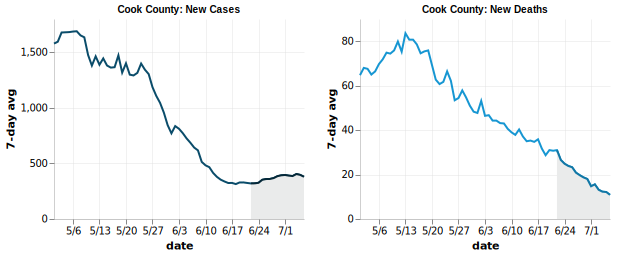

,county,state,state_abbrev,fips,date,Lat,Lon,cases,deaths,new_cases,new_deaths,cases_avg7,deaths_avg7,date2
98,Cook,Illinois,IL,17031,2020-05-01,41.841448,-87.816588,38668,1673,2155,66,1578.857143,64.714286,2020-05-01
99,Cook,Illinois,IL,17031,2020-05-02,41.841448,-87.816588,40227,1743,1559,70,1595.571429,68.000000,2020-05-02
100,Cook,Illinois,IL,17031,2020-05-03,41.841448,-87.816588,42324,1786,2097,43,1678.571429,67.571429,2020-05-03
101,Cook,Illinois,IL,17031,2020-05-04,41.841448,-87.816588,43715,1802,1391,16,1680.285714,65.000000,2020-05-04
102,Cook,Illinois,IL,17031,2020-05-05,41.841448,-87.816588,45223,1922,1508,120,1682.000000,66.428571,2020-05-05


In [5]:
start_date = date(2020, 5, 1)
cook = utils.county_case_charts("Cook, Illinois", start_date)
cook.head()

Other acceptable examples are:
```
start_date = date(2020, 5, 15)
dallas = utils.county_case_charts("Dallas, TX", start_date)
atlanta = utils.county_case_charts("Fulton, Georgia", start_date)
```

## State indicators for cases and deaths
* Uses the `state_case_charts` function within `utils`
* 7-day rolling average shown for new cases
* 7-day rolling average shown for new deaths 

The function takes `STATE_INFORMATION` as a string and `START_DATE` as a datetime variable, and returns the charts and the dataframe used to create the chart.

`STATE_INFORMATION` takes form of {STATE_NAME}:
* {STATE_NAME}: full state name or state abbreviation e.g. "California" or "CA"

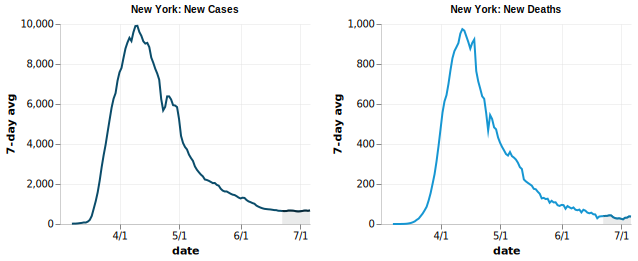

,state,state_abbrev,date,cases,deaths,new_cases,new_deaths,cases_avg7,deaths_avg7,date2
0,New York,NY,2020-03-02,1,0,1,0,NaN,NaN,2020-03-02
1,New York,NY,2020-03-03,2,0,1,0,NaN,NaN,2020-03-03
2,New York,NY,2020-03-04,11,0,9,0,NaN,NaN,2020-03-04
3,New York,NY,2020-03-05,23,0,12,0,NaN,NaN,2020-03-05
4,New York,NY,2020-03-06,31,0,8,0,NaN,NaN,2020-03-06


In [6]:
start_date = date(2020, 3, 1)
ny = utils.state_case_charts("New York", start_date)
ny.head()

Other acceptable examples are:
```
start_date = date(2020, 2, 15)
tn = utils.state_case_charts("Tennessee", start_date)
```

## MSA indicators for cases and deaths
* Uses the `msa_case_charts` function within `utils`
* 7-day rolling average shown for new cases
* 7-day rolling average shown for new deaths 

The function takes `METROPOLITAN_INFORMATION` as a string and `START_DATE` as a datetime variable, and returns the charts and the dataframe used to create the chart. [Our crosswalk makes this information available.](https://github.com/CityOfLosAngeles/covid19-indicators/blob/master/data/msa_county_pop_crosswalk.csv) 

`METROPOLITAN_INFORMATION` takes form of {CBSA NAME} or {CBSA CODE}:
* {CBSA NAME}: full metropolitan area name or any subset of it e.g. "Boston-Cambridge-Newton, MA-NH" or "Boston-Cambridge"
* {CBSA CODE}: e.g. "14460" for Boston-Cambridge-Newton, MA-NH or "31080" for Los Angeles-Long Beach-Anaheim, CA

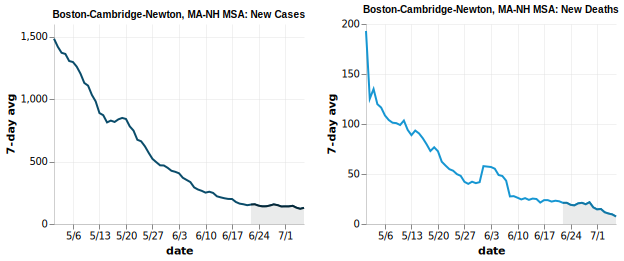

,msa,msa_pop,date,cases,deaths,new_cases,new_deaths,cases_avg7,deaths_avg7,date2
90,"Boston-Cambridge-Newton, MA-NH",4873019.0,2020-05-01,50001,2741,1650,117,1482.428571,193.000000,2020-05-01
91,"Boston-Cambridge-Newton, MA-NH",4873019.0,2020-05-02,51470,2846,1469,105,1418.000000,125.285714,2020-05-02
92,"Boston-Cambridge-Newton, MA-NH",4873019.0,2020-05-03,52414,2955,944,109,1369.714286,135.000000,2020-05-03
93,"Boston-Cambridge-Newton, MA-NH",4873019.0,2020-05-04,53473,3016,1059,61,1360.428571,119.857143,2020-05-04
94,"Boston-Cambridge-Newton, MA-NH",4873019.0,2020-05-05,54434,3103,961,87,1304.000000,116.428571,2020-05-05


In [7]:
start_date = date(2020, 5, 1)
boston_msa = utils.msa_case_charts("Boston-Cambridge", start_date)
boston_msa.head()

Other acceptable examples are:
```
start_date = date(2020, 4, 1)
dfw = utils.msa_case_charts("19100", start_date)
durham = utils.msa_case_charts("Durham-Chapel Hill", start_date)
```

## CA COVID-hospitalizations
* Uses the `county_covid_hospital_charts` function within `utils`
* 7-day rolling average shown for all COVID-related hospitalizations and COVID-ICU hospitalizations (subset of all hospitalizations)

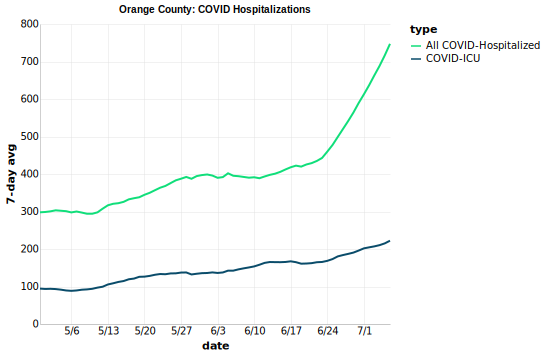

,county,fips,date,date2,hospitalized_covid,all_hospital_beds,icu_covid,all_icu_beds,surge_available_beds,hospitalized_avg7,icu_avg7
32,Orange,06059,2020-04-30,2020-04-30,282,4725,87,544,100,297.857143,94.428571
33,Orange,06059,2020-05-01,2020-05-01,319,4725,85,459,100,298.714286,93.428571
34,Orange,06059,2020-05-02,2020-05-02,322,5374,98,474,100,300.428571,93.857143
35,Orange,06059,2020-05-03,2020-05-03,308,5374,91,467,100,303.142857,93.142857
36,Orange,06059,2020-05-04,2020-05-04,294,5607,88,437,100,302.000000,91.571429


In [8]:
start_date = date(2020, 4, 30)
orange = utils.county_covid_hospital_charts("Orange, CA", start_date)
orange.head()

Other acceptable examples are:
```
start_date = date(2020, 5, 15)
sf = utils.county_covid_hospital_charts("06075", start_date)
santa_clara = utils.county_covid_hospital_charts("Santa Clara County", start_date)
sd = utils.county_covid_hospital_charts("San Diego County, CA", start_date)
```